<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-библиотек,-подготовка-инструментов-для-обработки-данных" data-toc-modified-id="Загрузка-библиотек,-подготовка-инструментов-для-обработки-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка библиотек, подготовка инструментов для обработки данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Сформируем-таблицу-с-информацией-о-фильмах-и-их-уровнях-сложностей:" data-toc-modified-id="Сформируем-таблицу-с-информацией-о-фильмах-и-их-уровнях-сложностей:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сформируем таблицу с информацией о фильмах и их уровнях сложностей:</a></span></li><li><span><a href="#Сформируем-таблицу-с-субтитрами-и-их-названиями:" data-toc-modified-id="Сформируем-таблицу-с-субтитрами-и-их-названиями:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сформируем таблицу с субтитрами и их названиями:</a></span></li><li><span><a href="#Cформируем-таблицу-с-общей-информацией-о-фильмах-и-субтитрах:" data-toc-modified-id="Cформируем-таблицу-с-общей-информацией-о-фильмах-и-субтитрах:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cформируем таблицу с общей информацией о фильмах и субтитрах:</a></span></li><li><span><a href="#Преобразуем-категориальные-признаки-(уровни-сложности)-в-количественные:" data-toc-modified-id="Преобразуем-категориальные-признаки-(уровни-сложности)-в-количественные:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Преобразуем категориальные признаки (уровни сложности) в количественные:</a></span></li></ul></li><li><span><a href="#Обучение-моделей:" data-toc-modified-id="Обучение-моделей:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей:</a></span><ul class="toc-item"><li><span><a href="#Разделяем-данные-на-тренировочную-и-тестовые-выборки:" data-toc-modified-id="Разделяем-данные-на-тренировочную-и-тестовые-выборки:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделяем данные на тренировочную и тестовые выборки:</a></span></li><li><span><a href="#Векторизация-данных:" data-toc-modified-id="Векторизация-данных:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Векторизация данных:</a></span><ul class="toc-item"><li><span><a href="#Методом-TF-Idf" data-toc-modified-id="Методом-TF-Idf-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Методом TF-Idf</a></span></li><li><span><a href="#Методом-BOW" data-toc-modified-id="Методом-BOW-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Методом BOW</a></span></li></ul></li><li><span><a href="#Получение-предсказаний:" data-toc-modified-id="Получение-предсказаний:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Получение предсказаний:</a></span><ul class="toc-item"><li><span><a href="#TF-Idf-+-Naive-Bayes-classifier" data-toc-modified-id="TF-Idf-+-Naive-Bayes-classifier-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>TF-Idf + Naive Bayes classifier</a></span></li><li><span><a href="#BOW-+-Naive-Bayes-classifier" data-toc-modified-id="BOW-+-Naive-Bayes-classifier-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>BOW + Naive Bayes classifier</a></span></li></ul></li><li><span><a href="#LogisticRegression-+-TF-Idf" data-toc-modified-id="LogisticRegression-+-TF-Idf-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LogisticRegression + TF-Idf</a></span></li><li><span><a href="#LogisticRegression-+-BOW" data-toc-modified-id="LogisticRegression-+-BOW-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LogisticRegression + BOW</a></span></li></ul></li><li><span><a href="#Результаты,-замечания-и-краткие-выводы:" data-toc-modified-id="Результаты,-замечания-и-краткие-выводы:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Результаты, замечания и краткие выводы:</a></span></li></ul></div>

# Загрузка библиотек, подготовка инструментов для обработки данных

In [1]:
import pandas as pd
import re
import pysrt
import difflib as dif
import numpy as np

from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /home/vladislav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vladislav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/vladislav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Инициализируем список стоп-слов и инструмент для лемматизации текста:

In [2]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

Функция для обработки субтитров:

In [3]:
def clean_subs(subs):
    
  subs = re.sub(re.compile('<.*?>'), '', subs)
  subs = re.sub('[^A-Za-z0-9]+', ' ', subs) 
  
  subs = subs.lower()
  
  tokens = nltk.word_tokenize(subs)
  
  subs = [word for word in tokens if word not in stop_words]
  
  subs = [lemmatizer.lemmatize(word) for word in subs]
  
  subs = ' '.join(subs)
  
  return subs

# Предобработка данных

## Сформируем таблицу с информацией о фильмах и их уровнях сложностей:

In [4]:
df_films_data = pd.read_excel('movies_labels.xlsx').drop('id', axis=1)
df_films_data

,Movie,Level
0,10_Cloverfield_lane(2016),B1
1,10_things_I_hate_about_you(1999),B1
2,A_knights_tale(2001),B2
3,A_star_is_born(2018),B2
4,Aladdin(1992),A2/A2+
...,...,...
236,Matilda(2022),C1
237,Bullet train,B1
238,Thor: love and thunder,B2
239,Lightyear,B2


Здесь `Movie` -- название фильма, `Level` -- его уровень сложности. Уберём нижнее подчёркивание в названиях:

In [5]:
df_films_data.Movie = df_films_data.Movie.apply(lambda x: re.sub(r'[_]', ' ', x))
df_films_data

,Movie,Level
0,10 Cloverfield lane(2016),B1
1,10 things I hate about you(1999),B1
2,A knights tale(2001),B2
3,A star is born(2018),B2
4,Aladdin(1992),A2/A2+
...,...,...
236,Matilda(2022),C1
237,Bullet train,B1
238,Thor: love and thunder,B2
239,Lightyear,B2


## Сформируем таблицу с субтитрами и их названиями:

In [6]:
path = Path('/home/vladislav/Practicum/Masterskaya')
path.exists()

True

In [7]:
python_files = path.glob('**/*.srt') 

D = []

for pf in python_files: 
    #print(pf)
    subs = pysrt.open(pf, encoding='iso-8859-1')
    D.append([pf.name, subs])

In [8]:
df_subs_data = pd.DataFrame(D, columns=['Subs', 'Subs_Data'])
df_subs_data

,Subs,Subs_Data
0,"Crown, The S01E01 - Wolferton Splash.en.SDH.srt","[ï»¿1\n00:00:10,640 --> 00:00:14,560\n[coughin..."
1,Suits.Episode 6- Privilege.srt,"[ï»¿1\n00:00:07,308 --> 00:00:09,208\nAvery mc..."
2,"Crown, The S01E05 - Smoke and Mirrors.en.srt","[ï»¿1\n00:00:29,240 --> 00:00:32,000\nYes.\n, ..."
3,"Crown, The S01E03 - Windsor.en.FORCED.srt","[ï»¿1\n00:30:13,960 --> 00:30:16,520\nDear Aun..."
4,Suits.S01E09.1080p.BluRay.AAC5.1.x265-DTG.02.E...,"[ï»¿1\n00:00:08,925 --> 00:00:09,967\nNo. Mike..."
...,...,...
273,The Walking Dead-S01E05-Wildfire.English.srt,"[1\n00:00:03,420 --> 00:00:04,922\n- ( walkie-..."
274,The Walking Dead-S01E06-TS-19.English.srt,"[1\n00:00:03,086 --> 00:00:06,215\n- ( people ..."
275,The Walking Dead-S01E02-Guts.English.srt,"[1\n00:00:03,045 --> 00:00:05,047\n- ( birds c..."
276,The Walking Dead-S01E04-Vatos.English.srt,"[1\n00:00:03,045 --> 00:00:05,422\n( birds chi..."


Здесь `Subs` -- название фильма, которому соответствуют субтитры, `Subs_Data` -- необработанные субтитры. Уберём нижнее подчёркивание в названиях:

In [9]:
df_subs_data.Subs = df_subs_data.Subs.apply(lambda x: re.sub(r'[_]', ' ', x))
df_subs_data

,Subs,Subs_Data
0,"Crown, The S01E01 - Wolferton Splash.en.SDH.srt","[ï»¿1\n00:00:10,640 --> 00:00:14,560\n[coughin..."
1,Suits.Episode 6- Privilege.srt,"[ï»¿1\n00:00:07,308 --> 00:00:09,208\nAvery mc..."
2,"Crown, The S01E05 - Smoke and Mirrors.en.srt","[ï»¿1\n00:00:29,240 --> 00:00:32,000\nYes.\n, ..."
3,"Crown, The S01E03 - Windsor.en.FORCED.srt","[ï»¿1\n00:30:13,960 --> 00:30:16,520\nDear Aun..."
4,Suits.S01E09.1080p.BluRay.AAC5.1.x265-DTG.02.E...,"[ï»¿1\n00:00:08,925 --> 00:00:09,967\nNo. Mike..."
...,...,...
273,The Walking Dead-S01E05-Wildfire.English.srt,"[1\n00:00:03,420 --> 00:00:04,922\n- ( walkie-..."
274,The Walking Dead-S01E06-TS-19.English.srt,"[1\n00:00:03,086 --> 00:00:06,215\n- ( people ..."
275,The Walking Dead-S01E02-Guts.English.srt,"[1\n00:00:03,045 --> 00:00:05,047\n- ( birds c..."
276,The Walking Dead-S01E04-Vatos.English.srt,"[1\n00:00:03,045 --> 00:00:05,422\n( birds chi..."


Сопоставим названиям субтитров названия фильмов с помощью `get_close_matches`, добавим "процент совпадения" `Score` названия фильма и сопоставленного ему массива субтитров:

In [10]:
film_names = df_films_data.Movie.tolist()
subs_names = df_subs_data.Subs.tolist()

In [11]:
DD = []
for film in film_names:
    res = dif.get_close_matches(film, subs_names, cutoff=0.75)
    try:
        score = dif.SequenceMatcher(None, film, res[0]).ratio()
        DD.append([film, res[0], score])
    except:
        DD.append([film, None, None])
    #print(f'film: {film},\n res: {res} \n')

In [12]:
df_names = pd.DataFrame(DD, columns=['Movie', 'Subs', 'Score'])
df_names

,Movie,Subs,Score
0,10 Cloverfield lane(2016),10 Cloverfield lane(2016).srt,0.925926
1,10 things I hate about you(1999),10 things I hate about you(1999).srt,0.941176
2,A knights tale(2001),A knights tale(2001).srt,0.909091
3,A star is born(2018),A star is born(2018).srt,0.909091
4,Aladdin(1992),Aladdin(1992).srt,0.866667
...,...,...,...
236,Matilda(2022),None,NaN
237,Bullet train,None,NaN
238,Thor: love and thunder,None,NaN
239,Lightyear,None,NaN


Параметр `Score` требуется для быстрого поиска потенциальных ошибок в сопоставлении.

Количество фильмов, для которых не удалось подобрать субтитры:

In [13]:
df_names.Subs.isna().sum()

7

Их мало, уберём лишние:

In [14]:
df_names = df_names[df_names.Subs.notna()]

Выгрузим данные для в excel-файл для анализа: 

In [15]:
df_names.to_excel('names.xlsx')

Проверка файла xlsx показывает, что неверных сопоставлений нет.

## Cформируем таблицу с общей информацией о фильмах и субтитрах:

Сначала избавимся от дубликатов:

In [16]:
df_films_data = df_films_data.drop_duplicates(ignore_index=True)
df_subs_data = df_subs_data.drop_duplicates(subset='Subs', ignore_index=True)
df_names = df_names.drop_duplicates(ignore_index=True);

В таблице `df_join` будт результаты объединения:

In [17]:
df_join = df_films_data.merge(df_names, how='left', on='Movie')\
.merge(df_subs_data, how='left', on='Subs')
df_join

,Movie,Level,Subs,Score,Subs_Data
0,10 Cloverfield lane(2016),B1,10 Cloverfield lane(2016).srt,0.925926,"[1\n00:00:55,279 --> 00:01:07,279\n<font color..."
1,10 things I hate about you(1999),B1,10 things I hate about you(1999).srt,0.941176,"[1\n00:01:54,281 --> 00:01:55,698\nHey!\n, 2\n..."
2,A knights tale(2001),B2,A knights tale(2001).srt,0.909091,"[1\n00:00:15,089 --> 00:00:21,229\nResync: Xen..."
3,A star is born(2018),B2,A star is born(2018).srt,0.909091,"[1\n00:00:17,610 --> 00:00:22,610\n- <i><font ..."
4,Aladdin(1992),A2/A2+,Aladdin(1992).srt,0.866667,"[1\n00:00:27,240 --> 00:00:30,879\n<i>Oh, I co..."
...,...,...,...,...,...
234,Matilda(2022),C1,NaN,NaN,NaN
235,Bullet train,B1,NaN,NaN,NaN
236,Thor: love and thunder,B2,NaN,NaN,NaN
237,Lightyear,B2,NaN,NaN,NaN


Было 239 и стало 239 после последнего merge (второго и последнего)

Есть дубликаты по названиям:

In [18]:
df_join[df_join.duplicated(subset=['Movie'], keep=False)]

,Movie,Level,Subs,Score,Subs_Data
73,The blind side(2009),B2,The blind side(2009).srt,0.909091,"[1\n00:00:29,405 --> 00:00:31,989\n[CROWD CHEE..."
81,The terminal(2004),B1,The terminal(2004).srt,0.900000,"[1\n00:00:26,200 --> 00:00:27,918\n<font color..."
82,The blind side(2009),B1,The blind side(2009).srt,0.909091,"[1\n00:00:29,405 --> 00:00:31,989\n[CROWD CHEE..."
97,The terminal(2004),"A2/A2+, B1",The terminal(2004).srt,0.900000,"[1\n00:00:26,200 --> 00:00:27,918\n<font color..."


Уберём эти дубликаты, присвоив каждому фильму высшую категорию сложности из возможных альтернатив:

In [19]:
df_join.loc[82, 'Level'] = 'B2'
df_join.loc[97, 'Level'] = 'B1'

In [20]:
df_join = df_join.drop_duplicates(subset=['Movie', 'Level', 'Subs', 'Score'], ignore_index=True);

Уберём фильмы, которым не удалось поставить в соответствие субтитры

In [21]:
df_join = df_join[df_join.Subs_Data.notna()]

Уберём столбцы, не участвующие в обучении:

In [22]:
df_join = df_join.drop(['Movie', 'Subs', 'Score'], axis=1)

Поменяем переходные уровни сложности `A2/A2+` на `A2`, `B1, B2` на `B2`, `A2/A2+, B1` на `B1`:

In [23]:
df_join.Level.replace({'A2/A2+' : 'A2', 'B1, B2' : 'B2', 'A2/A2+, B1' : 'B1'}, inplace=True)

In [24]:
df_join.Level.unique()

array(['B1', 'B2', 'A2', 'C1'], dtype=object)

Убираем данные без субтитров:

In [25]:
df_join = df_join[df_join.Subs_Data.apply(lambda x: len(x) != 0)]

In [26]:
df_join = df_join.reset_index(drop=True)

Итоговая таблица для обучения:

In [27]:
df_join

,Level,Subs_Data
0,B1,"[1\n00:00:55,279 --> 00:01:07,279\n<font color..."
1,B1,"[1\n00:01:54,281 --> 00:01:55,698\nHey!\n, 2\n..."
2,B2,"[1\n00:00:15,089 --> 00:00:21,229\nResync: Xen..."
3,B2,"[1\n00:00:17,610 --> 00:00:22,610\n- <i><font ..."
4,A2,"[1\n00:00:27,240 --> 00:00:30,879\n<i>Oh, I co..."
...,...,...
209,C1,"[ï»¿1\n00:00:01,383 --> 00:00:02,751\nI lost A..."
210,C1,"[ï»¿1\n00:00:00,052 --> 00:00:01,352\nPrevious..."
211,C1,"[ï»¿1\n00:00:01,436 --> 00:00:03,028\nI get Av..."
212,C1,"[ï»¿1\n00:00:00,024 --> 00:00:01,478\nPrevious..."


In [28]:
df_join.shape

(214, 2)

In [29]:
df_join[df_join['Level'].apply(lambda x: len(x) > 2)].count()

Level        0
Subs_Data    0
dtype: int64

После всех манипуляций количество записей сократилось с 241 до 214.

## Преобразуем категориальные признаки (уровни сложности) в количественные:

In [30]:
encoder = OrdinalEncoder(dtype='int64')
encoder.fit(df_join.Level.to_frame())

OrdinalEncoder(dtype='int64')

In [31]:
S = pd.Series([i[0] for i in encoder.transform(df_join.loc[:, 'Level'].to_frame())])
S.reset_index(drop=True);

In [32]:
df_join = pd.concat([df_join, S], axis=1)
df_join = df_join.drop('Level', axis=1)
df_join.rename({0: 'Level'}, axis=1, inplace=True)

Итоговая таблица для обучения:

In [33]:
df_join

,Subs_Data,Level
0,"[1\n00:00:55,279 --> 00:01:07,279\n<font color...",1
1,"[1\n00:01:54,281 --> 00:01:55,698\nHey!\n, 2\n...",1
2,"[1\n00:00:15,089 --> 00:00:21,229\nResync: Xen...",2
3,"[1\n00:00:17,610 --> 00:00:22,610\n- <i><font ...",2
4,"[1\n00:00:27,240 --> 00:00:30,879\n<i>Oh, I co...",0
...,...,...
209,"[ï»¿1\n00:00:01,383 --> 00:00:02,751\nI lost A...",3
210,"[ï»¿1\n00:00:00,052 --> 00:00:01,352\nPrevious...",3
211,"[ï»¿1\n00:00:01,436 --> 00:00:03,028\nI get Av...",3
212,"[ï»¿1\n00:00:00,024 --> 00:00:01,478\nPrevious...",3


Её размеры:

In [34]:
df_join.shape

(214, 2)

# Обучение моделей:

## Разделяем данные на тренировочную и тестовые выборки:

In [35]:
x = df_join.Subs_Data
y = df_join.Level

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 12345, test_size=0.3, stratify=y)

In [37]:
x_train = x_train.apply(lambda x: clean_subs(x.text))
x_test = x_test.apply(lambda x: clean_subs(x.text))

## Векторизация данных:

### Методом TF-Idf

Значение параметра ngram_range равное (1,3) даёт наилучший результат:

In [38]:
vect_tf = TfidfVectorizer(ngram_range=(1,3))

In [39]:
x_train_tf = vect_tf.fit_transform(x_train)
x_test_tf = vect_tf.transform(x_test)

### Методом BOW

Значение параметра `ngram_range` равное (1,3) даёт наилучший результат:

In [40]:
vect_bow = CountVectorizer(ngram_range=(1,3))

In [41]:
x_train_bow = vect_bow.fit_transform(x_train)
x_test_bow = vect_bow.transform(x_test)

## Получение предсказаний:

### TF-Idf + Naive Bayes classifier

In [42]:
clf = MultinomialNB()
clf.fit(x_train_tf, y_train)

y_pred = clf.predict(x_test_tf)

Точность предсказаний:

In [43]:
round(accuracy_score(y_test, y_pred), 3)

0.492

F1-мера:

In [44]:
round(f1_score(y_test, y_pred, average='micro'), 3)

0.492

Матрица ошибок:

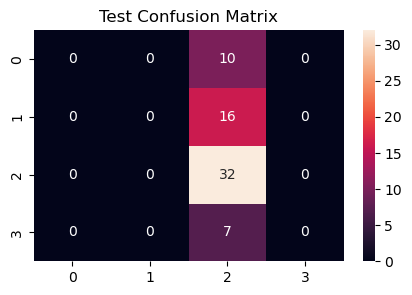

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### BOW + Naive Bayes classifier

In [46]:
clf = MultinomialNB()
clf.fit(x_train_bow, y_train)

y_pred = clf.predict(x_test_bow)

Точность предсказаний:

In [47]:
round(accuracy_score(y_test, y_pred), 3)

0.508

F1-мера:

In [48]:
round(f1_score(y_test, y_pred, average='micro'), 3)

0.508

Матрица ошибок:

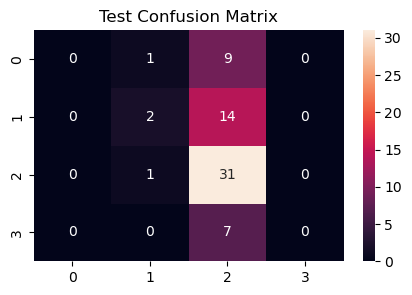

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

## LogisticRegression + TF-Idf

In [50]:
clf = LogisticRegression(random_state=1345072986, solver='lbfgs', class_weight='balanced')
clf.fit(x_train_tf, y_train)

y_pred = clf.predict(x_test_tf)

Точность предсказаний:

In [51]:
round(accuracy_score(y_test, y_pred), 3)

0.692

F1-мера:

In [52]:
round(f1_score(y_test, y_pred, average='micro'), 3)

0.692

Матрица ошибок:

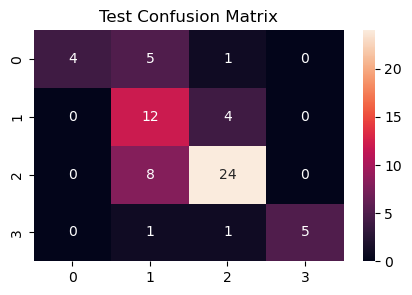

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

## LogisticRegression + BOW

In [54]:
clf = LogisticRegression(random_state=1345072986, solver='lbfgs', class_weight='balanced')
clf.fit(x_train_bow, y_train)

y_pred = clf.predict(x_test_bow)

/home/vladislav/Programs/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Точность предсказаний:

In [55]:
round(accuracy_score(y_test, y_pred), 3)

0.708

F1-мера:

In [56]:
round(f1_score(y_test, y_pred, average='micro'), 3)

0.708

Матрица ошибок:

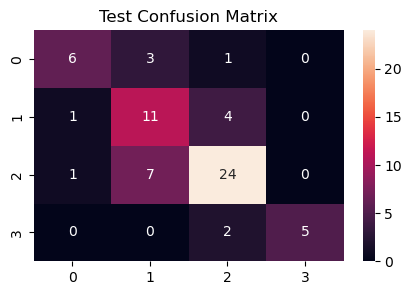

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# Результаты, замечания и краткие выводы:

- *Наилучший результат показала модель логистической регрессии на данных, векторизированных методом BOW*
- Эмпирическим путём было выявлено, что результаты сильно зависят от того, насколько качественно было произведено разделение выборки на обучающую и тестовую. Уверенной стабилизации качества в пределах одного значения так и не удалось добиться. 
- Результаты сильно падают, если параметр ngram_range ограничить только одним числом: 1, 2 или 3. Это может говорить о том, что на сложность фильма одновременно влияют сразу три фактора: количество редкоупотребляемых слов и устойчивых (неустойчивых?) словосочестаний из 2, 3 слов.
- Результаты могут сильно зависеть от того, как была произведена замена смешанных уровней сложности (в работе была произведена замена на низшие из представленых в альтернативе)
- Обнаружены следующие проблемы в данных: некоторым фильмам сопоставлено несколько наборов субтитров, каким-то вообще субтитры не сопоставлены.